In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

この前処理したデータの導入と一覧

In [11]:
df = pd.read_csv('train_yX.csv')
df['Dates'] = df['Dates'].astype('datetime64[ns]')
df

,Dates,dec_rate,signal,ESIndex,TYComdty,TargetPortDailyRtn,NKIndex,JBComdty,VGIndex,RXComdty,...,NAPMNIMPIndex,NHSPSTOTIndex,NHSPATOTIndex,ETSLTOTLIndex,NHSLTOTIndex,OUTFGAFIndex,EMPRGBCIIndex,CHPMINDXIndex,CONCCONFIndex,CONSSENTIndex
0,1999-04-01,-0.004176,0,0.007346,-0.001362,0.002121,0.036825,0.001509,0.009022,-0.000526,...,52.7,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
1,1999-04-02,-0.002029,0,0.000000,0.005730,0.003438,0.002449,-0.001432,0.000000,0.000000,...,52.7,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
2,1999-04-05,-0.006016,0,0.023604,0.000543,0.009767,0.000611,-0.001207,0.000000,0.000000,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
3,1999-04-06,-0.008308,0,-0.002250,0.004067,0.001540,0.004274,-0.002569,0.025426,0.010093,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
4,1999-04-07,0.000000,0,0.006013,-0.000810,0.001919,0.003040,0.006212,-0.008174,-0.000521,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,2016-12-26,-0.000217,0,0.000000,0.000000,0.000000,-0.002066,-0.000467,0.000000,0.000000,...,54.0,1090,1201,5.61,592,21.5,9.0,57.6,107.1,98.2
4628,2016-12-27,-0.000683,0,0.000442,-0.001267,-0.000583,0.000000,0.000000,0.002145,0.002994,...,54.0,1090,1201,5.61,592,21.5,9.0,57.6,113.7,98.2
4629,2016-12-28,-0.001023,0,-0.006966,0.003551,-0.000656,0.005694,0.000868,-0.000612,-0.000609,...,54.0,1090,1201,5.61,592,21.5,9.0,57.6,113.7,98.2
4630,2016-12-29,-0.000561,0,-0.000111,0.002401,0.001396,-0.018528,0.002067,-0.002142,0.003353,...,54.0,1090,1201,5.61,592,21.5,9.0,57.6,113.7,98.2


In [12]:
info_mkt = pd.read_csv('train_mkt_info.csv',index_col=0)
info_mkt

,補足,データ種類,設定すべきラグ日数,カテゴリ,補足.1
ESIndex,NaN,リターン,0,目的変数関連,米国株（先物）
TYComdty,NaN,リターン,0,目的変数関連,米国債（先物）
TargetPortDailyRtn,NaN,リターン,0,目的変数関連,株40債券60ポート
NKIndex,NaN,リターン,0,主要指数,日本株（先物）
JBComdty,NaN,リターン,0,主要指数,日本債（先物）
...,...,...,...,...,...
HGComdty,NaN,リターン,0,商品系,CMX銅（先物）
LBComdty,NaN,リターン,0,商品系,CME材木（先物）
BDIYindex,NaN,原数値,0,商品系,バルチック海運指数
XBTCurncy,NaN,原数値,0,商品系,ビットコイン


In [13]:
info_ind = pd.read_csv('train_ind_info.csv',index_col=0)
info_ind

,補足,データ種類,設定すべきラグ日数,カテゴリ,補足.1
NAPMPMIIndex,NaN,原数値,0,経済指標,製造業ISM 総合指数
NAPMNEWOIndex,NaN,原数値,0,経済指標,製造業ISM 新規受注
NAPMPRODIndex,NaN,原数値,0,経済指標,製造業ISM 生産
NAPMSUPLIndex,NaN,原数値,0,経済指標,製造業ISM 入荷遅延
NAPMEMPLIndex,NaN,原数値,0,経済指標,製造業ISM 雇用
NAPMINVIndex,NaN,原数値,0,経済指標,製造業ISM 在庫
NAPMBACKIndex,NaN,原数値,0,経済指標,製造業ISM 受注残
NAPMEXPTIndex,NaN,原数値,0,経済指標,製造業ISM 輸出
NAPMIMPTIndex,NaN,原数値,0,経済指標,製造業ISM 輸入
NAPMNMIIndex,NaN,原数値,0,経済指標,非製造業ISM 総合指数


データの統計的な特性

In [14]:
df.dtypes

Dates            datetime64[ns]
dec_rate                float64
signal                    int64
ESIndex                 float64
TYComdty                float64
                      ...      
OUTFGAFIndex            float64
EMPRGBCIIndex           float64
CHPMINDXIndex           float64
CONCCONFIndex           float64
CONSSENTIndex           float64
Length: 99, dtype: object

In [15]:
df.describe()

,dec_rate,signal,ESIndex,TYComdty,TargetPortDailyRtn,NKIndex,JBComdty,VGIndex,RXComdty,HIIndex,...,NAPMNIMPIndex,NHSPSTOTIndex,NHSPATOTIndex,ETSLTOTLIndex,NHSLTOTIndex,OUTFGAFIndex,EMPRGBCIIndex,CHPMINDXIndex,CONCCONFIndex,CONSSENTIndex
count,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,...,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4035.000000,4632.000000,4632.000000,4632.000000
mean,-0.004905,0.030872,0.000177,0.000158,0.000165,0.000199,0.000089,0.000152,0.000156,0.000328,...,52.759607,1283.009499,1300.018998,5.485386,724.809585,5.456066,7.793408,54.578325,88.055117,84.819106
std,0.006810,0.172990,0.012214,0.003837,0.004728,0.015491,0.002127,0.015339,0.003457,0.015683,...,4.603425,502.369523,504.912842,0.740785,331.254296,15.858404,15.415776,7.805331,26.532093,12.759031
min,-0.097661,0.000000,-0.098778,-0.024001,-0.040431,-0.130664,-0.015052,-0.090119,-0.018527,-0.108160,...,32.500000,458.000000,494.000000,3.830000,250.000000,-41.300000,-38.200000,31.400000,25.000000,55.300000
25%,-0.007134,0.000000,-0.004992,-0.001996,-0.002122,-0.007229,-0.000834,-0.007089,-0.001740,-0.006950,...,50.000000,890.000000,903.000000,4.980000,420.000000,-3.700000,-3.200000,49.900000,65.400000,75.100000
50%,-0.002774,0.000000,0.000365,0.000120,0.000182,0.000000,0.000000,0.000000,0.000168,0.000000,...,53.000000,1206.000000,1232.000000,5.270000,647.000000,7.300000,9.000000,55.700000,91.700000,86.900000
75%,0.000000,0.000000,0.005640,0.002358,0.002451,0.007999,0.001114,0.007716,0.002244,0.007781,...,55.500000,1676.000000,1698.000000,5.940000,1001.000000,15.400000,19.500000,60.400000,104.000000,93.000000
max,0.000000,1.000000,0.141134,0.036305,0.049601,0.206983,0.015289,0.120507,0.019783,0.120082,...,63.500000,2276.000000,2217.000000,7.330000,1431.000000,43.400000,42.100000,71.200000,144.700000,112.000000


dec_rateの相関性研究

In [16]:
df.corr()

C:\Users\aaa\AppData\Local\Temp\ipykernel_20032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,dec_rate,signal,ESIndex,TYComdty,TargetPortDailyRtn,NKIndex,JBComdty,VGIndex,RXComdty,HIIndex,...,NAPMNIMPIndex,NHSPSTOTIndex,NHSPATOTIndex,ETSLTOTLIndex,NHSLTOTIndex,OUTFGAFIndex,EMPRGBCIIndex,CHPMINDXIndex,CONCCONFIndex,CONSSENTIndex
dec_rate,1.000000,-0.158853,0.093297,0.034185,0.113043,0.108066,0.023130,0.093896,0.038372,0.111891,...,0.141880,-0.000387,0.001136,0.080149,-0.016783,0.158510,0.177392,0.155941,-0.013803,0.013526
signal,-0.158853,1.000000,0.004225,0.011989,0.010203,-0.011198,0.010479,0.011574,0.028624,-0.020198,...,-0.123085,-0.052178,-0.059975,-0.088145,-0.045735,-0.136458,-0.176891,-0.092548,-0.061207,-0.081596
ESIndex,0.093297,0.004225,1.000000,-0.302785,0.885817,0.147763,-0.057516,0.591817,-0.238151,0.223447,...,-0.003849,-0.011496,-0.013188,-0.000834,-0.014014,0.002831,-0.005893,0.008095,-0.020743,-0.012786
TYComdty,0.034185,0.011989,-0.302785,1.000000,0.174039,-0.076530,0.086046,-0.320701,0.590657,-0.108051,...,0.001770,-0.009689,-0.011519,-0.010151,-0.008688,-0.014429,-0.004942,-0.006507,-0.007669,-0.013211
TargetPortDailyRtn,0.113043,0.010203,0.885817,0.174039,1.000000,0.115413,-0.017533,0.455344,0.041518,0.178266,...,-0.003115,-0.016596,-0.019235,-0.005804,-0.018710,-0.004100,-0.008715,0.005196,-0.025167,-0.019643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OUTFGAFIndex,0.158510,-0.136458,0.002831,-0.014429,-0.004100,0.004610,0.013727,0.012222,-0.004060,0.011320,...,0.516479,0.257565,0.266413,0.386413,0.237613,1.000000,0.693182,0.683399,0.266337,0.386924
EMPRGBCIIndex,0.177392,-0.176891,-0.005893,-0.004942,-0.008715,0.005273,0.007243,0.003497,-0.005210,0.010023,...,0.544060,0.393961,0.393076,0.488144,0.428690,0.693182,1.000000,0.565755,0.335085,0.391440
CHPMINDXIndex,0.155941,-0.092548,0.008095,-0.006507,0.005196,0.008359,-0.000761,0.004246,0.016825,-0.001373,...,0.451594,0.101810,0.103360,0.278312,0.076511,0.683399,0.565755,1.000000,0.063193,0.114396
CONCCONFIndex,-0.013803,-0.061207,-0.020743,-0.007669,-0.025167,-0.013610,0.015704,-0.002376,-0.019069,-0.000576,...,0.414456,0.701998,0.703711,0.334373,0.634414,0.266337,0.335085,0.063193,1.000000,0.920499


C:\Users\aaa\AppData\Local\Temp\ipykernel_20032\2178637603.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="plasma",annot=False)


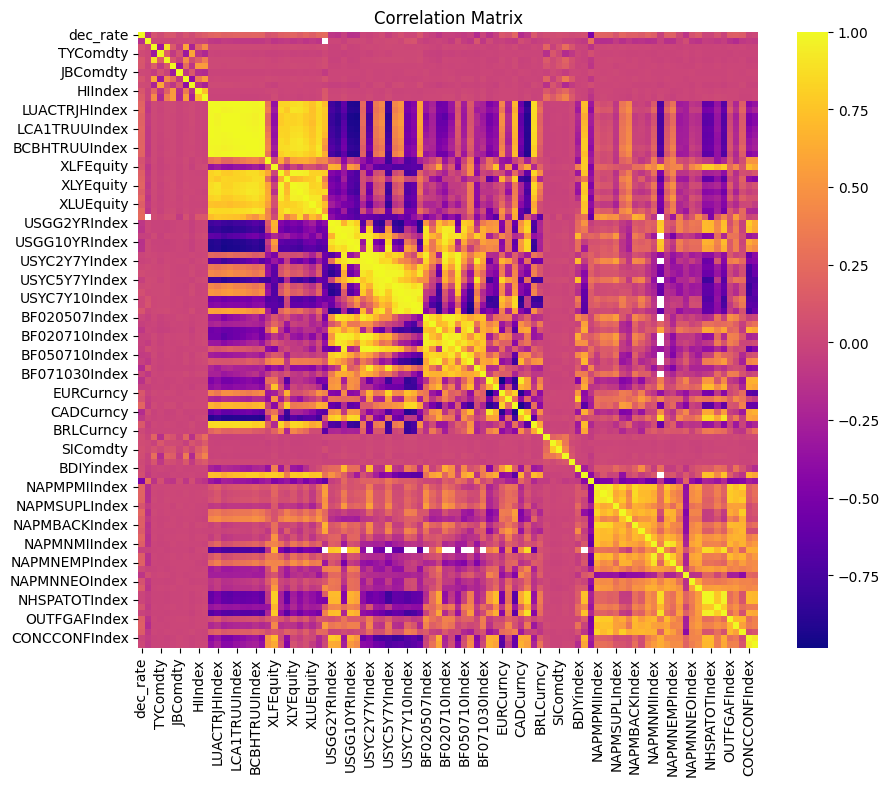

In [20]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="plasma",annot=False)
plt.title("Correlation Matrix")

plt.show()

In [8]:
target_cor = df.corr()['dec_rate']#dec_rateと他の指標の相関性一覧
target_cor

C:\Users\aaa\AppData\Local\Temp\ipykernel_25532\1642972738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_cor = df.corr()['dec_rate']


dec_rate              1.000000
signal               -0.158853
ESIndex               0.093297
TYComdty              0.034185
TargetPortDailyRtn    0.113043
                        ...   
OUTFGAFIndex          0.158510
EMPRGBCIIndex         0.177392
CHPMINDXIndex         0.155941
CONCCONFIndex        -0.013803
CONSSENTIndex         0.013526
Name: dec_rate, Length: 98, dtype: float64

In [9]:
target_cor.sort_values()

VIXIndex        -0.494217
BF051030Index   -0.179042
CADCurncy       -0.170639
signal          -0.158853
USGG10YRIndex   -0.138660
                   ...   
NAPMEMPLIndex    0.220619
LUACTRJHIndex    0.222547
XLBEquity        0.229496
XLREEquity       0.244504
dec_rate         1.000000
Name: dec_rate, Length: 98, dtype: float64

In [10]:
target_cor.sort_values(ascending=False)

dec_rate         1.000000
XLREEquity       0.244504
XLBEquity        0.229496
LUACTRJHIndex    0.222547
NAPMEMPLIndex    0.220619
                   ...   
USGG10YRIndex   -0.138660
signal          -0.158853
CADCurncy       -0.170639
BF051030Index   -0.179042
VIXIndex        -0.494217
Name: dec_rate, Length: 98, dtype: float64

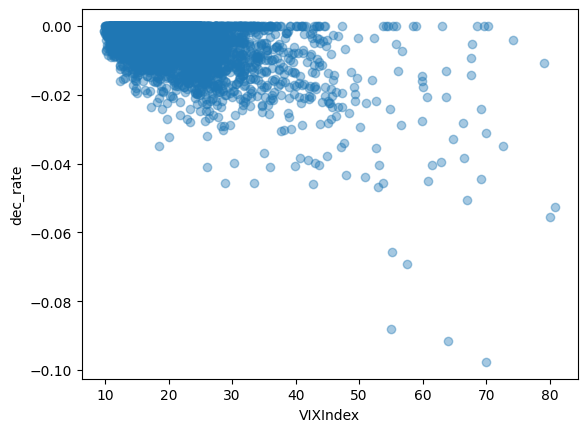

In [14]:
plt .scatter(df['VIXIndex'],df['dec_rate'],alpha=0.4)
plt.xlabel('VIXIndex')
plt.ylabel('dec_rate')
plt.show()

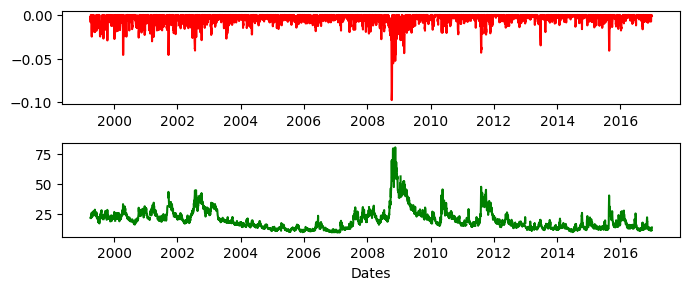

In [25]:
x=df['Dates']
y1=df['dec_rate']
y2=df['VIXIndex']

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(7,3))
ax1.plot(x,y1,c='red')
ax2.plot(x,y2,c='green')
ax2.set_xlabel('Dates')
plt.tight_layout()
plt.show()

dec_rateの自己相関と偏自己相関のプロット

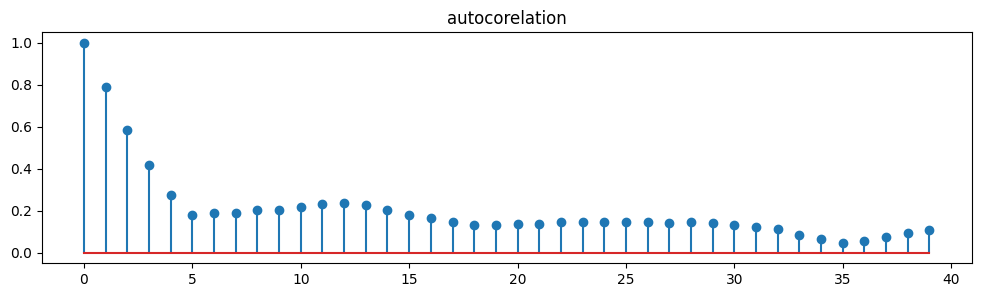

'\n# Create a stem plot using matplotlib\'s pyplot\nplt.stem(range(len(df["dec_rate"])), acf_values)\nplt.xlabel("Lag")\nplt.ylabel("Autocorrelation")\nplt.title("Autocorrelation Function (ACF)")\n\n# Set the significance level for confidence intervals\nalpha = 0.05\nlower_conf_int = -1.96 / np.sqrt(len(df["dec_rate"]))\nupper_conf_int = 1.96 / np.sqrt(len(df["dec_rate"]))\n\n# Draw horizontal lines for confidence intervals\nplt.axhline(lower_conf_int, linestyle="--", color="r", alpha=0.5)\nplt.axhline(upper_conf_int, linestyle="--", color="r", alpha=0.5)\n\n# Show the plot\nplt.show()\n'

In [49]:
len(df["dec_rate"])

lag_range=range(len(df["dec_rate"]))

temp_list=[]
for i in lag_range:
    acf_values = pd.Series(df["dec_rate"]).autocorr(lag=i)
    temp_list.append(acf_values)

plt.stem(range(40),temp_list[:40])
plt.title('autocorelation')
plt.show()
'''
# Create a stem plot using matplotlib's pyplot
plt.stem(range(len(df["dec_rate"])), acf_values)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF)")

# Set the significance level for confidence intervals
alpha = 0.05
lower_conf_int = -1.96 / np.sqrt(len(df["dec_rate"]))
upper_conf_int = 1.96 / np.sqrt(len(df["dec_rate"]))

# Draw horizontal lines for confidence intervals
plt.axhline(lower_conf_int, linestyle="--", color="r", alpha=0.5)
plt.axhline(upper_conf_int, linestyle="--", color="r", alpha=0.5)

# Show the plot
plt.show()
'''

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

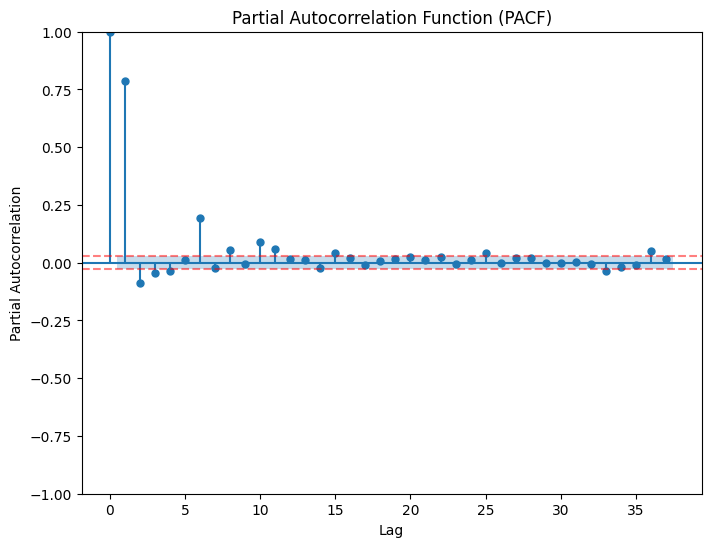

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_pacf(df["dec_rate"], alpha=0.05, lags=None, ax=ax)

# Set the significance level for confidence intervals
alpha = 0.05

# Draw horizontal lines for confidence intervals
lower_conf_int = -1.96 / np.sqrt(len(df["dec_rate"]))
upper_conf_int = 1.96 / np.sqrt(len(df["dec_rate"]))
ax.axhline(lower_conf_int, linestyle="--", color="r", alpha=0.5)
ax.axhline(upper_conf_int, linestyle="--", color="r", alpha=0.5)

# Set plot labels and title
ax.set_xlabel("Lag")
ax.set_ylabel("Partial Autocorrelation")
ax.set_title("Partial Autocorrelation Function (PACF)")

# Show the plot
plt.show()